# Easy linguistic analysis

Hello and welcome to my project! I would like to show you how to perform a simple lignuistic analysis using python and jupyter notebook! It may seem difficult at first, but it is actually very simple!

## Setting things up

The first thing we need to do is pick a text to analyse. What I will do for this particular project is scrape an article about blue whales, but you can use this method for any other text on the internet.

> The term *scraping* refers to data extraction from a website.

   Next, we need to think about the aspects to focus on. The tool used to scrape data in this project is *BeautifulSoup*, which allows the user to specify what exactly they want to scrape. We may for example scrape links, paragraphs, or elements containing a particular word. For now, let's try to scrape the entire webpage.

<img src="Pictures/humpback-calf.jpg">

In [5]:
import requests
page = requests.get("https://www.livescience.com/secret-blue-whale-population-discovered.html") 
print(page.status_code)


200


It is important to check the status code. If the output is *200* as in the above example, it means that the website is accesible.

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [7]:
paragraphs = soup.find_all('p')
links = soup.find_all('a')

By specifying _p_, we will obtain the paragraphs present in the webpage. On the other hand, _a_ will search for links.

## Tokenization

Now, lets try to create word tokens using the nltk module. 

In [8]:
import nltk
tokens = nltk.tokenize.word_tokenize(soup.get_text())
print(tokens)

['Nuclear', 'bomb', 'detectors', 'uncover', 'secret', 'population', 'of', 'blue', 'whales', 'hiding', 'in', 'Indian', 'Ocean', '|', 'Live', 'Science', 'Skip', 'to', 'main', 'content', 'Live', 'Science', 'Search', 'Subscribe', 'RSS', 'Please', 'deactivate', 'your', 'ad', 'blocker', 'in', 'order', 'to', 'see', 'our', 'subscription', 'offer', 'News', 'Space', '&', 'Physics', 'Health', 'Planet', 'Earth', 'Strange', 'News', 'Animals', 'History', 'Forums', 'Tech', 'Culture', 'Reference', 'About', 'Us', 'Magazine', 'subscriptions', 'More', 'TrendingCoronavirus', 'NewsForumLife', "'s", 'Little', 'MysteriesMagazine', 'DealsLive', 'Science', 'newsletters', 'Live', 'Science', 'is', 'supported', 'by', 'its', 'audience', '.', 'When', 'you', 'purchase', 'through', 'links', 'on', 'our', 'site', ',', 'we', 'may', 'earn', 'an', 'affiliate', 'commission', '.', 'Learn', 'more', 'Home', 'News', 'Nuclear', 'bomb', 'detectors', 'uncover', 'secret', 'population', 'of', 'blue', 'whales', 'hiding', 'in', 'Indi

If you print the text, you will notice that the tokens are cluttered with more than words. We have numbers, special characters and punctuation mixed in as well! These are ***not*** welcome among word tokens, so we need to filter them out.

In [9]:
wordtokens = []
for token in tokens:
    if token.isalpha():
        wordtokens.append(token)

The tokens are now cleaned up! We can also now check how many unique words appear in the text.

In [10]:
fdist1 = nltk.FreqDist(wordtokens)
count = len(fdist1)
count

517

### Tagging

Now it is time to tag our tokens with parts of speech. For the sake of simplicity, I will use the universal set of tags.

In [24]:
from nltk import pos_tag
tags = pos_tag(wordtokens, tagset='universal')
print(tags)

[('Nuclear', 'ADJ'), ('bomb', 'NOUN'), ('detectors', 'NOUN'), ('uncover', 'ADV'), ('secret', 'ADJ'), ('population', 'NOUN'), ('of', 'ADP'), ('blue', 'ADJ'), ('whales', 'NOUN'), ('hiding', 'VERB'), ('in', 'ADP'), ('Indian', 'ADJ'), ('Ocean', 'NOUN'), ('Live', 'NOUN'), ('Science', 'NOUN'), ('Skip', 'NOUN'), ('to', 'PRT'), ('main', 'ADJ'), ('content', 'ADJ'), ('Live', 'NOUN'), ('Science', 'NOUN'), ('Search', 'NOUN'), ('Subscribe', 'NOUN'), ('RSS', 'NOUN'), ('Please', 'NOUN'), ('deactivate', 'VERB'), ('your', 'PRON'), ('ad', 'NOUN'), ('blocker', 'NOUN'), ('in', 'ADP'), ('order', 'NOUN'), ('to', 'PRT'), ('see', 'VERB'), ('our', 'PRON'), ('subscription', 'NOUN'), ('offer', 'NOUN'), ('News', 'NOUN'), ('Space', 'NOUN'), ('Physics', 'NOUN'), ('Health', 'NOUN'), ('Planet', 'NOUN'), ('Earth', 'NOUN'), ('Strange', 'NOUN'), ('News', 'NOUN'), ('Animals', 'NOUN'), ('History', 'NOUN'), ('Forums', 'NOUN'), ('Tech', 'NOUN'), ('Culture', 'NOUN'), ('Reference', 'NOUN'), ('About', 'ADP'), ('Us', 'NOUN'), (

We can also sum how many times each part of speech appears among the tokens.

In [27]:
from collections import Counter

counted_tokens = Counter([token for i,token in tags])
print(counted_tokens)

Counter({'NOUN': 423, 'VERB': 175, 'ADJ': 133, 'ADP': 132, 'DET': 123, 'PRON': 44, 'ADV': 43, 'PRT': 29, 'CONJ': 18, 'NUM': 6})


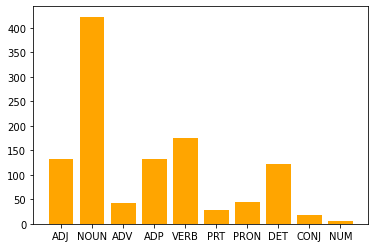

In [31]:
import matplotlib.pyplot as plt

plt.bar(range(len(counted_tokens)), list(counted_tokens.values()), color = 'orange')
plt.xticks(range(len(counted_tokens)), list(counted_tokens.keys()))
plt.show()

Let's see what will happen if we remove duplicates from our tokens.

In [28]:
unique = list(dict.fromkeys(tags))
unique_tokens = Counter([token for i,token in unique])
print(unique_tokens)

Counter({'NOUN': 260, 'VERB': 100, 'ADJ': 73, 'ADV': 31, 'ADP': 23, 'PRON': 18, 'DET': 16, 'NUM': 5, 'CONJ': 4, 'PRT': 2})


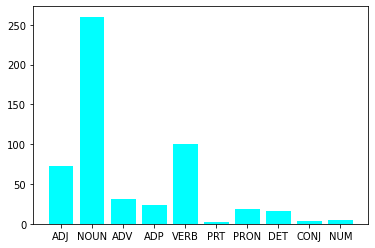

In [30]:
import matplotlib.pyplot as plt

plt.bar(range(len(unique_tokens)), list(unique_tokens.values()), color = 'cyan')
plt.xticks(range(len(unique_tokens)), list(unique_tokens.keys()))
plt.show()

Notice how dramatically the number of determiners and adpositional phrases has dropped down. The rest of the stats however are kept in the same proportion. 